# ***MATH340 Project---UBC transportation optimization***

Student 1 Name: Kaiwen Liu\
Student 1 ID:  78229960\
Student 2 Name: Yujia Ma \
Student 2 ID: 97540850


**Introduction (Background & Aim)**\
UBC exchange bus loop is always crowded by students every weekday in rush hours(5-6 pm). However, for some bus lines, people have to wait in a 50-meter-long line for a long time, while for others, it's not that crowded. That means the schedule of buses can be modified and optimized to relieve the transportation burden and thus reduce carbon emissions and waiting time.Our goal is to make the most of each bus in peak hours, which means we aim to make sure all students can be transported out of campus in one hour, and in the meanwhile, total carbon emission by all buses is minimum.\
Method we use: linear programming (Pulp package in python)


# Data collection & simulation
## 1.Data Collection
### bus size
3 types of buses and their capacity: Mini-Bus(14 seats) ,Standard Bus(50) ,Articulated Bus(75)

### bus line
We consider 9 bus lines coming from UBC : 4, 9, 14, 25, 33, 68, 84, 99, R4\
**print dataframe here**

 to the 2019 UBC Vancouver Transportation Status Report, 54% of commuters to UBC use
public transit. Given there are 58,768 students (UBC, 2022) and on-campus housing accounts for over
13,000 students (UBC, n.d.), the upper bound for how many students use public transit is roughly 24,715.


### students data
People use public transit to commute to UBC: 49%(UBC,2021)[1]\
Total number of students: 58,768(UBC,2022)[4]\
Students living on campus: more than 13000(UBC)[2]\

### carbon emission
Small medium and large size bus need approximately 20L, 30L and 45L gasoline to run 100km respectively. Each liter of gasoline generates 2.7kg carbon dioxide.As such we can get their carbon emission per km:\
**Mini-Bus**:  20L * 2.7kg/L / 100km = 0.54kg/km\
**Standard Bus**: 30L * 2.7kg/L / 100km = 0.81kg/km\
**Articulated Bus**:  45L * 2.7kg/L / 100km = 1.215kg/km(2019)[2]

## 2.Data Simulation
### population around each bus stop:
**surrounding population**: We define it as the total number of UBC students living around a certain bus stop.
(e.g. the surrounding population for bus stop#15 is 100 means: there are 100 UBC students living around bus stop#15)
Some bus stops conjunct several bus lines, while some are only for one bus line. What we have to make sure of is that the total number of people transported to one bus stop>=the surrounding population of that bus stop.

* We suppose: As the UBC bus loop is the terminal bus stop in the westernmost part of Vancouver, which is far from the city center, the main factor leading to the crowded bus is UBC students. Thus, we assume that buses can only be fully loaded at the UBC bus loop, which means there are always enough seats for passengers at all the other stops.
* As data of the amount of UBC students living around each stop is missing, we randomly simulated students number in a reasonable range based on certain facts: \
  Busy area: the area near downtown is the busy area of transportation.As such,we assume more people living around this area.\
  Campus surrounding area: since students are tend to rent houses around campus, we assume more people living around campus as well.

### stops on each bus line
We have 59(index from 0 to 58) stops in total.Here shows what stops are on each bus line:\
**4**:[0, 30, 31, 32, 44, 45, 47, 49, 50, 52, 53, 40],\
**14**:[0, 29, 31, 33, 35, 37, 39, 40],\
**25**:[0, 16, 18, 19, 20, 21, 22, 23],\
**33**:[0, 15, 17, 18, 24, 25, 26, 27, 28],\
**49**:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
**68**:[0, 54, 55, 56, 57, 58],\
**R4**:[0, 11, 4, 12, 13, 14],\
**84**:[0, 41, 42, 43, 44, 46, 48, 51, 40],\
**99**:[0, 29, 31, 34, 36, 37, 38, 40]


* surrounding population for 59 stops are:[0,
 418,
 394,
 375,
 265,
 303,
 380,
 164,
 285,
 522,
 518,
 373,
 331,
 591,
 511,
 528,
 588,
 340,
 325,
 385,
 343,
 307,
 575,
 570,
 299,
 335,
 290,
 506,
 570,
 525,
 483,
 414,
 178,
 187,
 225,
 330,
 159,
 349,
 161,
 417,
 414,
 441,
 452,
 515,
 240,
 198,
 313,
 348,
 268,
 201,
 356,
 347,
 568,
 568,
 368,
 331,
 178,
 280,
 160]

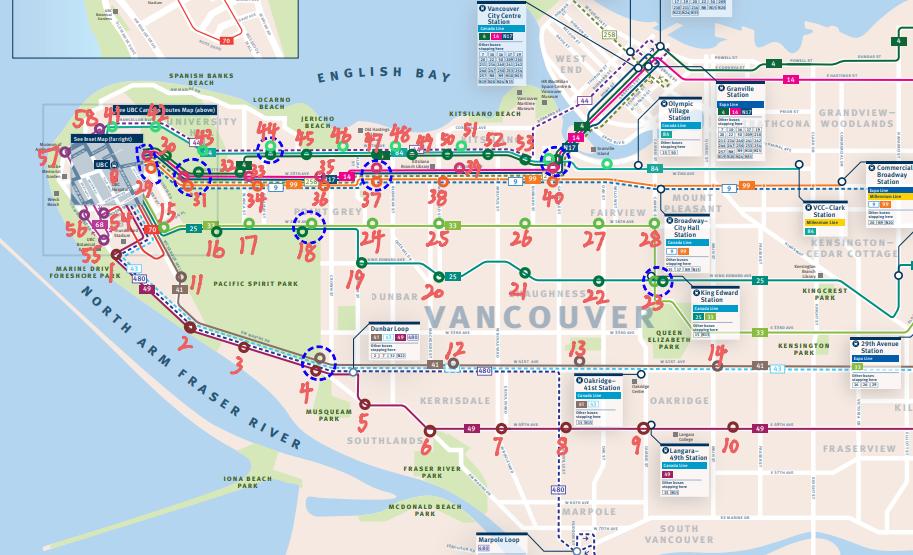

For each color line is a bus line, and each Circle means a bus stop.


## population capacity of each bus stop
Let the minimum needed population capacity of each bus stop be sp1,sp2…spm. We can calculate this sp array by using p array. For each bus stop, we track all bus lines that can get to this bus stop, and sum up all the surrounding populations which the bus lines have to reach before this bus stop. Then we get the sp array, which means the capacity needed from start to this bus stop to satisfy this bus stop’s surrounding population.\
Sp1 = P1\
Sp2 = P2\
Sp3 = P1+P2+P3\
Sp4 = P1+P2+P3+P4\
Sp5 = P1+P3+P4+P5\
Sp6 = P1+P2+P4+P6\
Sp7 = P1+P2+P3+P4+P5+P6+P7\
For each color line is a bus line, and each Circle means a bus stop.


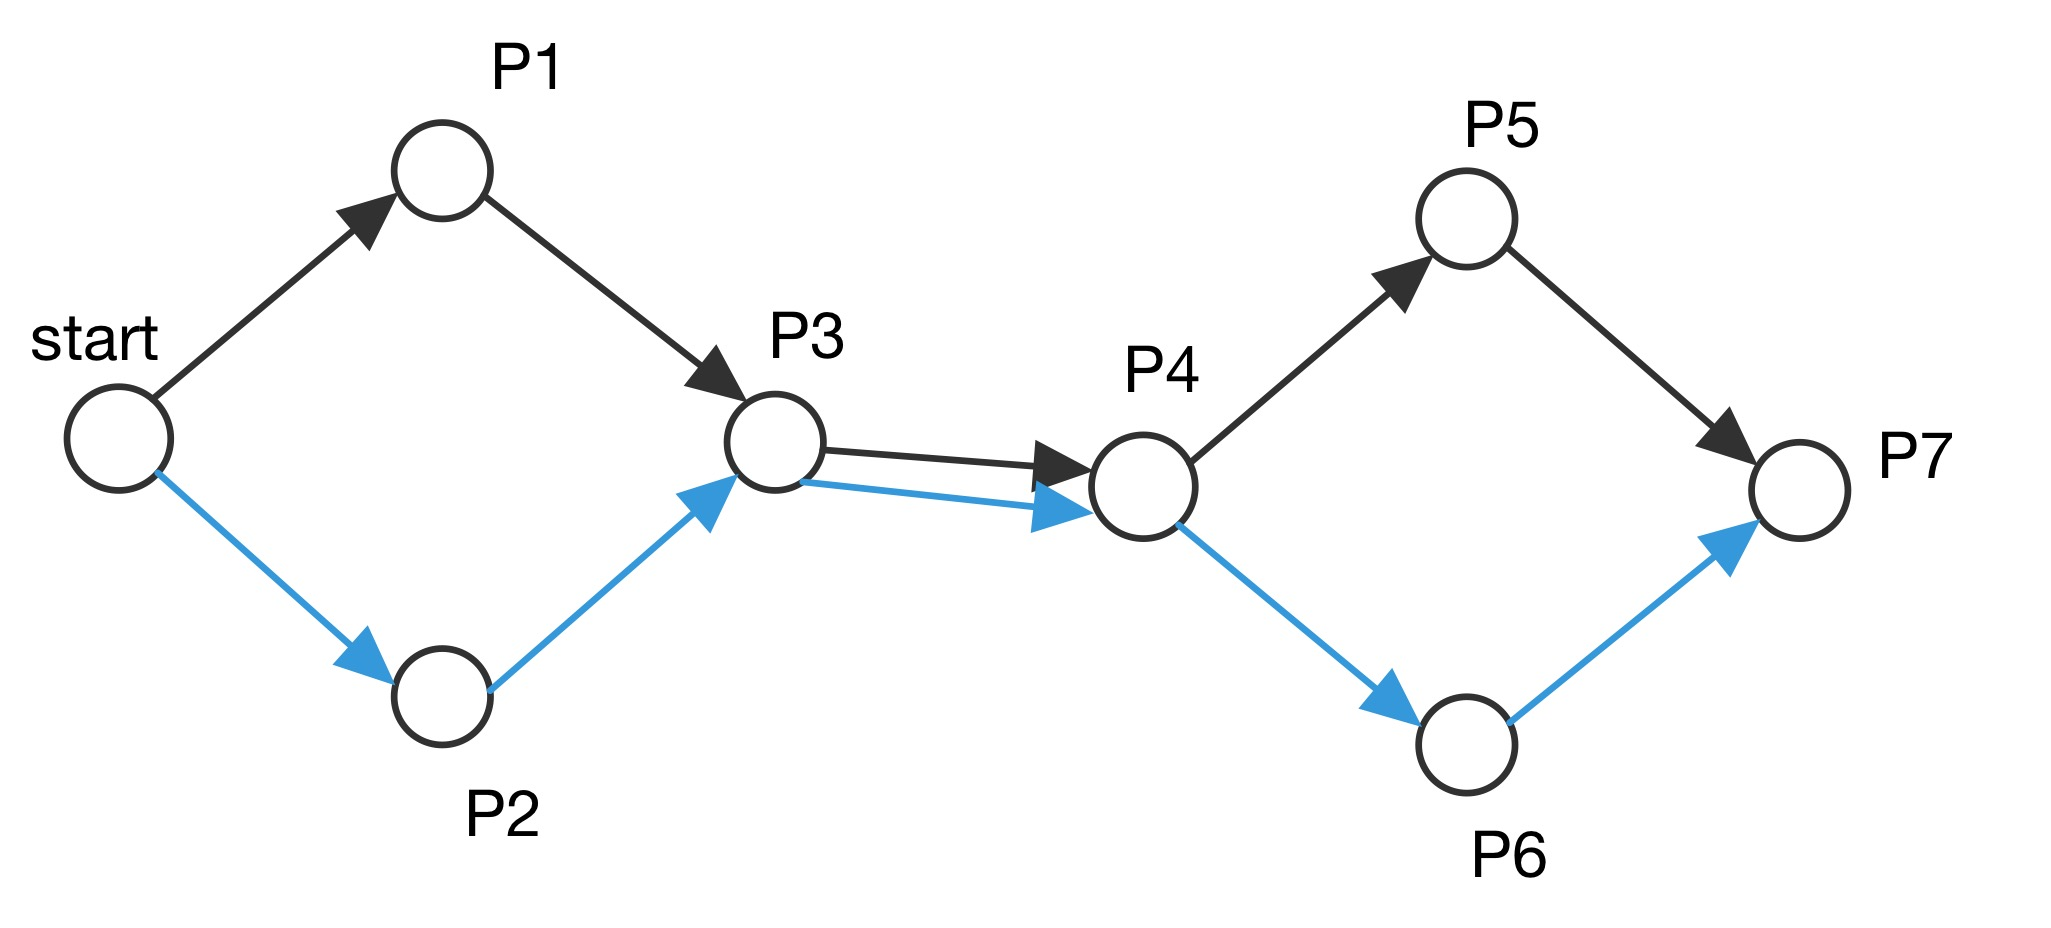


* population capacity for 59 bus stops(from index 0 to 59):\
[21365,   418,   812,  1187,  1825,  1755,  2135,  2299,  2584,
3106,  3624,   373,   969,  1560,  2071,   528,   588,   868,
1781,  1298,  1641,  1948,  2523,  3093,  1492,  1827,  2117,
2623,  3193,   525,   483,  1422,  1075,  1126,  1164,  1456,
1323,  2189,  1833,  2222,  8657,   441,   893,  1408,  2723,
1513,  1961,  1861,  2229,  2062,  2418,  2576,  2986,  3554,
368,   699,   877,  1157,  1317]

In [1]:
import pandas as pd
bus_list = [['4',18,'Standard Bus'],['14',18,'Standard Bus'],['25',23.19,'Standard Bus'],['33',17.63,'Standard Bus'],['49',20.88,'Articulated Bus'],['68',7,'Mini Bus'],['R4',13,'Articlated Bus'],['84',14,'Standard Bus'],['99',13.42,'Articlated Bus']]

df = pd.DataFrame (bus_list, columns = ['bus line', 'total length(km)','bus type'])
df

,bus line,total length(km),bus type
0,4,18.00,Standard Bus
1,14,18.00,Standard Bus
2,25,23.19,Standard Bus
3,33,17.63,Standard Bus
4,49,20.88,Articulated Bus
5,68,7.00,Mini Bus
6,R4,13.00,Articlated Bus
7,84,14.00,Standard Bus
8,99,13.42,Articlated Bus


# LP Model
### objective function:
minimize:\
$\vec{x} = <x_1,x_2,x_3...x_n>$ where $x_i$ stands for the number of buses of bus line i getting out of UBC bus loop\
$\vec{c} = <e_1,e_2,e_3...e_n>$ where $e_i$ stands for carbon emission for each bus to travel from starting station to terminal station.\
*meaning in reality: total amount of carbon emission for all buses in rush hours coming out of UBC bus loop.
### subject to:
1.for starting station:$\vec{w}*\vec{x} >= U$\
where U stands for total amount of UBC students.$w_i$ stands for capacity for one bus of line i. $x_i$stands for the number of buses of bus line i getting out of UBC bus loop.

2.for other stops: $A*\vec{x} >=\vec{b}$\
where each entry in A $a_{ij}$ stands for carrying capacity for bus $x_{ij}$, and $b_{i}$ stands for population capacity of bus stop i(same as $Sp_i$ above).\
*meaning in reality: total amount of students that can be transported to stop i should >= the total amount of students living aroung this stop.So that we can make sure all students can be transported out of UBC.\ In this case, we consider the scenario where buses fully load,instead of making sure that each person has a seat.
3.non-negative constraints:$\vec{x}>=0$

In [2]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.0 MB/s eta 0:00:00


In [3]:
import sys
!{sys.executable} -m pip install pulp 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 51.1 MB/s eta 0:00:00


In [4]:
import pulp
from pulp import*

In [5]:
costs = [0.54*6,0.81*12,1.215*12.5,1.215*13,1.215*12.5,0.54*10,0.54*9.5,0.81*10,1.214*11]
capacities = [14,29,48,48,48,14,14,29,48]

In [6]:
p = [0,
 418,
 394,
 375,
 265,
 303,
 380,
 164,
 285,
 522,
 518,
 373,
 331,
 591,
 511,
 528,
 588,
 340,
 325,
 385,
 343,
 307,
 575,
 570,
 299,
 335,
 290,
 506,
 570,
 525,
 483,
 414,
 178,
 187,
 225,
 330,
 159,
 349,
 161,
 417,
 414,
 441,
 452,
 515,
 240,
 198,
 313,
 348,
 268,
 201,
 356,
 347,
 568,
 568,
 368,
 331,
 178,
 280,
 160]

In [7]:
edges = []
edge = [0,30,31,32,44,45,47,49,50,52,53,40] #
edges.append(edge)
edge = [0,29,31,33,35,37,39,40] #red
edges.append(edge)
edge = [0,16,18,19,20,21,22,23] #blue
edges.append(edge)
edge = [0,15,17,18,24,25,26,27,28] #black
edges.append(edge)
edge = [0,1,2,3,4,5,6,7,8,9,10] #yellow
edges.append(edge)
edge = [0,54,55,56,57,58] #white
edges.append(edge)
edge = [0,11,4,12,13,14] #orange
edges.append(edge)
edge = [0,41,42,43,44,46,48,51,40] #light red
edges.append(edge)
edge = [0,29,31,34,36,37,38,40] #blue
edges.append(edge)
edges

[[0, 30, 31, 32, 44, 45, 47, 49, 50, 52, 53, 40],
 [0, 29, 31, 33, 35, 37, 39, 40],
 [0, 16, 18, 19, 20, 21, 22, 23],
 [0, 15, 17, 18, 24, 25, 26, 27, 28],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0, 54, 55, 56, 57, 58],
 [0, 11, 4, 12, 13, 14],
 [0, 41, 42, 43, 44, 46, 48, 51, 40],
 [0, 29, 31, 34, 36, 37, 38, 40]]

In [8]:
import numpy as np 
totalp=sum(p)
sp = []
vis = [0] * 80
sp.append(totalp)
for point in range(58):
    nowpoint = point+1
    nowsp = 0
    for j in range(59):
        vis[j] = 0
    for j in range(9):
        for k in range(len(edges[j])):
            if (nowpoint == edges[j][k]):
                for kk in range(k+1):
                    vis[edges[j][kk]] = 1
    for j in range(59):
        if (vis[j]):
            nowsp += p[j]
    sp.append(nowsp)
np.asarray(sp)

array([21365,   418,   812,  1187,  1825,  1755,  2135,  2299,  2584,
        3106,  3624,   373,   969,  1560,  2071,   528,   588,   868,
        1781,  1298,  1641,  1948,  2523,  3093,  1492,  1827,  2117,
        2623,  3193,   525,   483,  1422,  1075,  1126,  1164,  1456,
        1323,  2189,  1833,  2222,  8657,   441,   893,  1408,  2723,
        1513,  1961,  1861,  2229,  2062,  2418,  2576,  2986,  3554,
         368,   699,   877,  1157,  1317])

In [9]:
bus=["bus"+str(i) for i in range(9)]

In [10]:
stop=["stop"+str(i) for i in range(59)]

In [11]:
Lp_carbon = pulp.LpProblem(name="carbon", sense=LpMinimize)

In [12]:
x = []
for i in range(9):
    x.append(pulp.LpVariable(name=bus[i], lowBound=0, cat = 'Integer'))

In [13]:
Lp_carbon += costs[0]*x[0] + costs[1]*x[1] + costs[2]*x[2] + costs[3]*x[3] + costs[4]*x[4] + costs[5]*x[5] + costs[6]*x[6] + costs[7]*x[7] + costs[8]*x[8]

In [14]:
for i in range(59):
    ans = 0
    for j in range(9):
        for k in range(len(edges[j])):
            if (edges[j][k] == i):
                ans += capacities[j]*x[j]
    Lp_carbon += (ans >= sp[i], stop[i])

In [15]:
status = Lp_carbon.solve()

In [16]:
print(Lp_carbon)

carbon:
MINIMIZE
3.24*bus0 + 9.72*bus1 + 15.187500000000002*bus2 + 15.795000000000002*bus3 + 15.187500000000002*bus4 + 5.4*bus5 + 5.130000000000001*bus6 + 8.100000000000001*bus7 + 13.354*bus8 + 0.0
SUBJECT TO
stop0: 14 bus0 + 29 bus1 + 48 bus2 + 48 bus3 + 48 bus4 + 14 bus5 + 14 bus6
 + 29 bus7 + 48 bus8 >= 21365

stop1: 48 bus4 >= 418

stop2: 48 bus4 >= 812

stop3: 48 bus4 >= 1187

stop4: 48 bus4 + 14 bus6 >= 1825

stop5: 48 bus4 >= 1755

stop6: 48 bus4 >= 2135

stop7: 48 bus4 >= 2299

stop8: 48 bus4 >= 2584

stop9: 48 bus4 >= 3106

stop10: 48 bus4 >= 3624

stop11: 14 bus6 >= 373

stop12: 14 bus6 >= 969

stop13: 14 bus6 >= 1560

stop14: 14 bus6 >= 2071

stop15: 48 bus3 >= 528

stop16: 48 bus2 >= 588

stop17: 48 bus3 >= 868

stop18: 48 bus2 + 48 bus3 >= 1781

stop19: 48 bus2 >= 1298

stop20: 48 bus2 >= 1641

stop21: 48 bus2 >= 1948

stop22: 48 bus2 >= 2523

stop23: 48 bus2 >= 3093

stop24: 48 bus3 >= 1492

stop25: 48 bus3 >= 1827

stop26: 48 bus3 >= 2117

stop27: 48 bus3 >= 2623

stop28

LP Model:\
MINIMIZE\
$3.24*bus0 + 9.72*bus1 + 15.187500000000002*bus2 + 15.795000000000002*bus3 + 15.187500000000002*bus4 + 5.4*bus5 + 5.130000000000001*bus6 + 8.100000000000001*bus7 + 13.354*bus8 + 0.0$
SUBJECT TO\
stop0: 18 bus0 + 25 bus1 + 40 bus2 + 40 bus3 + 40 bus4 + 18 bus5 + 18 bus6 + 25 bus7 + 40 bus8 >= 10805

stop1: 25 bus7 + 40 bus8 >= 391

stop2: 18 bus0 + 25 bus1 + 40 bus2 + 40 bus4 >= 331

stop3: 18 bus0 + 25 bus1 + 40 bus2 + 40 bus3 >= 647

stop4: 18 bus0 + 25 bus1 + 40 bus2 >= 973

stop5: 18 bus0 >= 1295

stop6: 18 bus0 >= 1622

stop7: 18 bus0 >= 2002

stop8: 18 bus0 + 40 bus8 >= 2745

stop9: 40 bus3 + 40 bus4 >= 995

stop10: 18 bus5 + 18 bus6 >= 242

stop11: 40 bus8 >= 914

stop12: 25 bus1 + 40 bus2 >= 1150

stop13: 40 bus4 >= 924

stop14: 18 bus6 >= 488

stop15: 25 bus7 >= 641

stop16: 40 bus8 >= 1170

stop17: 25 bus7 >= 891

stop18: 40 bus8 >= 1408

stop19: 25 bus1 >= 1361

stop20: 40 bus2 >= 1315

stop21: 40 bus3 >= 1431

stop22: 40 bus3 >= 1166

stop23: 40 bus3 + 40 bus4 >= 1469

stop24: 18 bus5 + 18 bus6 >= 699

stop25: 25 bus7 >= 1100

stop26: 25 bus1 >= 1657

stop27: 40 bus2 + 40 bus3 >= 2642

stop28: 40 bus4 >= 1741

stop29: 40 bus4 >= 1505

stop30: 40 bus4 >= 1237

stop31: 18 bus5 + 18 bus6 >= 840

stop32: 25 bus7 + 40 bus8 >= 2229

stop33: 40 bus2 + 40 bus3 >= 2876

stop34: 40 bus2 + 40 bus4 >= 3054

stop35: 18 bus5 >= 670

stop36: 25 bus7 >= 1289

stop37: 40 bus8 >= 1615

stop38: 25 bus1 >= 1769

stop39: 40 bus3 >= 1893

stop40: 40 bus2 >= 1826

stop41: 40 bus4 >= 1972

stop42: 18 bus5 >= 746

stop43: 18 bus6 >= 890

stop44: 25 bus1 + 40 bus3 >= 3470

stop45: 25 bus1 + 40 bus3 >= 3588

stop46: 40 bus2 + 40 bus4 >= 3499

stop47: 18 bus5 >= 852

stop48: 18 bus5 >= 997

stop49: 40 bus8 >= 1704

stop50: 18 bus6 >= 1245

stop51: 25 bus7 + 40 bus8 >= 2796

stop52: 18 bus6 + 25 bus7 + 40 bus8 >= 4342

VARIABLES\
0 <= bus0 Integer\
0 <= bus1 Integer\
0 <= bus2 Integer\
0 <= bus3 Integer\
0 <= bus4 Integer\
0 <= bus5 Integer\
0 <= bus6 Integer\
0 <= bus7 Integer\
0 <= bus8 Integer


### Primal optimal solution:

## Dual Problem

In [17]:
Lp_dual = pulp.LpProblem(name="dual", sense=LpMaximize)

In [18]:
y = []
for i in range(59):
    y.append(pulp.LpVariable(name=stop[i], lowBound=0))

In [19]:
ans = 0
for i in range(59):
    ans += sp[i]*y[i]
Lp_dual += ans

In [20]:
Mx = np.arange(59*9).reshape((59,9))
for i in range(59):
    for j in range(9):
        Mx[i][j] = 0
        for k in range(len(edges[j])):
            if (edges[j][k] == i):
                Mx[i][j] = capacities[j]
Mx_transpose = Mx.transpose()
for i in range(9):
    ans = 0
    for j in range(59):
        ans += Mx_transpose[i][j]*y[j]
    Lp_dual += (ans<=costs[i],bus[i])

In [21]:
status = Lp_dual.solve()

In [22]:
print(Lp_dual)

dual:
MAXIMIZE
21365*stop0 + 418*stop1 + 3624*stop10 + 373*stop11 + 969*stop12 + 1560*stop13 + 2071*stop14 + 528*stop15 + 588*stop16 + 868*stop17 + 1781*stop18 + 1298*stop19 + 812*stop2 + 1641*stop20 + 1948*stop21 + 2523*stop22 + 3093*stop23 + 1492*stop24 + 1827*stop25 + 2117*stop26 + 2623*stop27 + 3193*stop28 + 525*stop29 + 1187*stop3 + 483*stop30 + 1422*stop31 + 1075*stop32 + 1126*stop33 + 1164*stop34 + 1456*stop35 + 1323*stop36 + 2189*stop37 + 1833*stop38 + 2222*stop39 + 1825*stop4 + 8657*stop40 + 441*stop41 + 893*stop42 + 1408*stop43 + 2723*stop44 + 1513*stop45 + 1961*stop46 + 1861*stop47 + 2229*stop48 + 2062*stop49 + 1755*stop5 + 2418*stop50 + 2576*stop51 + 2986*stop52 + 3554*stop53 + 368*stop54 + 699*stop55 + 877*stop56 + 1157*stop57 + 1317*stop58 + 2135*stop6 + 2299*stop7 + 2584*stop8 + 3106*stop9 + 0
SUBJECT TO
bus0: 14 stop0 + 14 stop30 + 14 stop31 + 14 stop32 + 14 stop40 + 14 stop44
 + 14 stop45 + 14 stop47 + 14 stop49 + 14 stop50 + 14 stop52 + 14 stop53
 <= 3.24

bus1: 29 st

dual:\
MAXIMIZE\
$10805*stop0 + 391*stop1 + 242*stop10 + 914*stop11 + 1150*stop12 + 924*stop13 + 488*stop14 + 641*stop15 + 1170*stop16 + 891*stop17 + 1408*stop18 + 1361*stop19 + 331*stop2 + 1315*stop20 + 1431*stop21 + 1166*stop22 + 1469*stop23 + 699*stop24 + 1100*stop25 + 1657*stop26 + 2642*stop27 + 1741*stop28 + 1505*stop29 + 647*stop3 + 1237*stop30 + 840*stop31 + 2229*stop32 + 2876*stop33 + 3054*stop34 + 670*stop35 + 1289*stop36 + 1615*stop37 + 1769*stop38 + 1893*stop39 + 973*stop4 + 1826*stop40 + 1972*stop41 + 746*stop42 + 890*stop43 + 3470*stop44 + 3588*stop45 + 3499*stop46 + 852*stop47 + 997*stop48 + 1704*stop49 + 1295*stop5 + 1245*stop50 + 2796*stop51 + 4342*stop52 + 1622*stop6 + 2002*stop7 + 2745*stop8 + 995*stop9 + 0$
SUBJECT TO\
$bus0: 18 stop0 + 18 stop2 + 18 stop3 + 18 stop4 + 18 stop5 + 18 stop6
 + 18 stop7 + 18 stop8 <= 3.24$

$bus1: 25 stop0 + 25 stop12 + 25 stop19 + 25 stop2 + 25 stop26 + 25 stop3
 + 25 stop38 + 25 stop4 + 25 stop44 + 25 stop45 <= 9.72$

$bus2: 40 stop0 + 40 stop12 + 40 stop2 + 40 stop20 + 40 stop27 + 40 stop3
 + 40 stop33 + 40 stop34 + 40 stop4 + 40 stop40 + 40 stop46 <= 15.1875$

$bus3: 40 stop0 + 40 stop21 + 40 stop22 + 40 stop23 + 40 stop27 + 40 stop3
 + 40 stop33 + 40 stop39 + 40 stop44 + 40 stop45 + 40 stop9 <= 15.795$

$bus4: 40 stop0 + 40 stop13 + 40 stop2 + 40 stop23 + 40 stop28 + 40 stop29
 + 40 stop30 + 40 stop34 + 40 stop41 + 40 stop46 + 40 stop9 <= 15.1875$
$bus5: 18 stop0 + 18 stop10 + 18 stop24 + 18 stop31 + 18 stop35 + 18 stop42
 + 18 stop47 + 18 stop48 <= 5.4$

$bus6: 18 stop0 + 18 stop10 + 18 stop14 + 18 stop24 + 18 stop31 + 18 stop43
 + 18 stop50 + 18 stop52 <= 5.13$

$bus7: 25 stop0 + 25 stop1 + 25 stop15 + 25 stop17 + 25 stop25 + 25 stop32
 + 25 stop36 + 25 stop51 + 25 stop52 <= 8.1$

$bus8: 40 stop0 + 40 stop1 + 40 stop11 + 40 stop16 + 40 stop18 + 40 stop32
 + 40 stop37 + 40 stop49 + 40 stop51 + 40 stop52 + 40 stop8 <= 13.354$


### Dual optimal solution

In [23]:
print("status : ", Lp_dual.status, LpStatus[Lp_dual.status])
print("objective : ", Lp_dual.objective.value())
for var in Lp_dual.variables():
    print(var.name,": ", var.value())

status :  1 Optimal
objective :  7239.56616968
stop0 :  0.0
stop1 :  0.0
stop10 :  0.31640625
stop11 :  0.0
stop12 :  0.0
stop13 :  0.0
stop14 :  0.36642857
stop15 :  0.0
stop16 :  0.0
stop17 :  0.0
stop18 :  0.0
stop19 :  0.0
stop2 :  0.0
stop20 :  0.0
stop21 :  0.0
stop22 :  0.0
stop23 :  0.31640625
stop24 :  0.0
stop25 :  0.0
stop26 :  0.0
stop27 :  0.0
stop28 :  0.3290625
stop29 :  0.0
stop3 :  0.0
stop30 :  0.0
stop31 :  0.0
stop32 :  0.0
stop33 :  0.0
stop34 :  0.0
stop35 :  0.0
stop36 :  0.0
stop37 :  0.0
stop38 :  0.27820833
stop39 :  0.33517241
stop4 :  0.0
stop40 :  0.0
stop41 :  0.0
stop42 :  0.0
stop43 :  0.0
stop44 :  0.0
stop45 :  0.0
stop46 :  0.0
stop47 :  0.0
stop48 :  0.0
stop49 :  0.0
stop5 :  0.0
stop50 :  0.0
stop51 :  0.27931034
stop52 :  0.0
stop53 :  0.23142857
stop54 :  0.0
stop55 :  0.0
stop56 :  0.0
stop57 :  0.0
stop58 :  0.38571429
stop6 :  0.0
stop7 :  0.0
stop8 :  0.0
stop9 :  0.0


## Further analysis
our further analysis consists of 2 parts:
1.release bus burden(because we do not want buses to always fully load)
2.sensitivity analysis

### 1.Release bus burden
#### Compare with the case where everyone has a seat
In our original problem, we suppose that buses fully loaded which means buses are very crowded and many passengers have to stand all the way home.Here we plan to find a way to release bus burden. Thus, we suppose bus capacity equals to number seats.That is to say, all passengers have seats.

### Result Visualization
 We visualize the total number of passengers each bus line transports in these 2 scenarios: bus fully loaded or all passengers have seats. We can quickly tell that bus line 0 transports much more passengers than most of other bus lines. 

 ***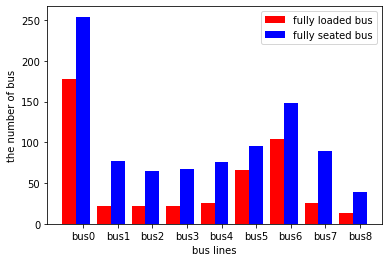***
 
 ***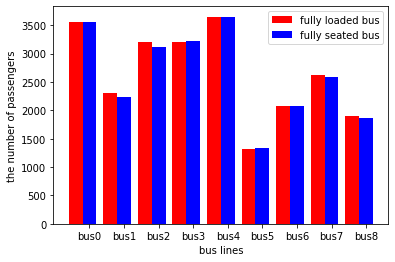***

 ***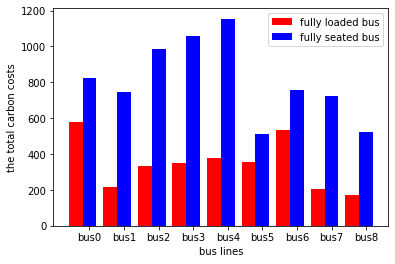***
 
We can tell the top3 busy lines are bus line 4, 0 and 2
To reduce burden of buses, we may consider:
* solution 1.add more bus lines to the area where busy bus lines passes by
* solution 2.add more buses for bus busy bus line
Based on our comparison of 2 scenarios, our original one gives how many buses we need at least(lower bound), our second one gives us how many buses we need at most(upper bound). As such,if we choose solution 2, the number of buses added to each bus line should be between the lower bound and upper bound, depending on to what extend we want to lease bus burden. 


### 2.Sensitivity analysis
Based on our primal problem: $x^*=哈哈$.Changes in optimal carbon emission(objective value) in dual problem can be represented as $Z^{**}-Z^{*}=\vec{t}\vec{x}$,where each component in $\vec{t}$ represents a small change$\epsilon$ We can tell that carbon emission is most sensitive to number changes in bus line 0.Thus, if we plan to add buses of these lines to reduce bus burden, we may want to add less buses in these lines to avoid too much carbon emission.**哈哈也许这里也可以加visualization**

## Discussion
### Optimal value to Primal and Dual
In reality,the number of buses should be integer. However, if we set variables to primal and dual problem integer, we would get 0 as optimal value to dual problem while 4946.602 to the primal problem. In this case, when we want to double check if our solution is optimal, we should not set variables as integer.

### What constraints actually effect results

$stop5: 18 bus0 >= 1295$

$stop6: 18 bus0 >= 1622$

$stop7: 18 bus0 >= 2002$

Above is an typical example we found in our LP model that makes us inerested. Here we can see that these 3 constraints share the same coefficient and variable with different right hand side $b_i$. In this case, what actually effects our optimal result is the constraint of stop7 as constraint of stop7 is more strict than stop5 and 6. There are many such cases in our LP model,which means the problem could be simplified.
### What causes constraints being ineffective
Along one bus line, as SP (defined in simulated data) accumulates, the right hand side $b_i$ accumulates. Thus, in all constraints with same coefficients, only the one with largest $b_i$ is effective. What's more, when bus lines have intersections , both coefficients and $b_i$ changes compared to constraints with only 1 bus. As such, constraints representing intersection are also effective.\
To add, not all constraints representing intersection are effective.For instance.\
$stop44: 25 bus1 + 40 bus3 >= 3470$

$stop45: 25 bus1 + 40 bus3 >= 3588$

stop44 is the first time bus1 and bus3 intersects, and after that, they share the same route till stop45. In this case, only constraint of stop 45 is effective. Essentially, the reason why constraint of stop44 is ineffective is the same as the reason why constraints of stop5 and 6 are ineffective. Due to the accumulation of amount of passengers, $b_i$ increases along the bus line.So among all constraints with same right hand side, only the one with largest $b_i$ is effective.

### What kind of bus map has more constraints that are effective
From our discussion above,only 2 kinds of constraints are effective:
* on each intersected bus route: constraints with largest $b_i$
* on each bus route with single bus line: constraints with largest $b_i$\
As such, for a bus map with given amount of bus lines,simply enlarging stop numbers or bus line length does not increase the number of effective constraints. Instead, a map with more bus line intersections has more effective constraints.




## References
[1]"Transportation Status Report Fall 2021."The University of British Columbia website.The University of British Columbia.June 2022.https://planning.ubc.ca/sites/default/files/2022-06/UBC2021-TransportationStatusReport-FINAL.pdf

[2]"UBC Student housing."The University of British Columbia website.The University of British Columbia.https://vancouver.housing.ubc.ca/getting-started/prospective/

[3]"Dataset of different buses"Dimensions.Text by Bryan Maddock.
November 1, 2019.https://www.dimensions.com/collection/buses

[4]"UBC Overview & Facts" The University of British Columbia website.The University of British Columbia.2022.https://www.ubc.ca/about/facts.html


## 处理sensitivity


In [24]:
import numpy as np
from gurobipy import *
Mx = np.arange(59*9).reshape((59,9))
for i in range(59):
    for j in range(9):
        Mx[i][j] = 0
        for k in range(len(edges[j])):
            if (edges[j][k] == i):
                Mx[i][j] = capacities[j]
Mx_transpose = Mx.transpose()

stop
bus
sp
Mx_transpose
costs

n = len(sp)
m = len(costs)
assert(Mx_transpose.shape == (m,n) and (len(stop) == n) and (len(bus) == m))
model = Model()
x = model.addVars(n,name=stop)
obj = model.setObjective(quicksum(sp[j] * x[j] for j in range(n)), GRB.MAXIMIZE)
con = []
for i in range(m):
  con.append(model.addConstr(quicksum(Mx_transpose[i,j] * x[j] for j in range(n)) <= costs[i], name = bus[i]))
model.optimize()

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 9 rows, 59 columns and 77 nonzeros
Model fingerprint: 0x48d070b8
Coefficient statistics:
  Matrix range     [1e+01, 5e+01]
  Objective range  [4e+02, 2e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 9 rows and 59 columns
Presolve time: 0.03s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2395662e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective  7.239566199e+03


In [25]:
print('Sensitivity Analysis (SA)\nObjVal =', model.ObjVal)
# model.printAttr(['X','Obj','SAObjLow','SAObjUp'])
model.printAttr(['Sense','Slack','Pi','RHS','SARHSLow','SARHSUp'])

Sensitivity Analysis (SA)
ObjVal = 7239.566199045568

  Constraint        Sense        Slack           Pi          RHS     SARHSLow      SARHSUp 
------------------------------------------------------------------------------------------
        bus0            <            0      253.857         3.24 -4.44089e-16          inf 
        bus1            <            0      76.6207         9.72            0          inf 
        bus2            <            0      64.4375      15.1875 -1.77636e-15          inf 
        bus3            <            0      66.5208       15.795            0          inf 
        bus4            <            0         75.5      15.1875 -1.77636e-15          inf 
        bus5            <            0      94.0714          5.4            0          inf 
        bus6            <            0      147.929         5.13            0          inf 
        bus7            <            0      88.8276          8.1            0          inf 
        bus8            <  

In [26]:
import numpy as np
from gurobipy import *
Mx = np.arange(59*9).reshape((59,9))
for i in range(59):
    for j in range(9):
        Mx[i][j] = 0
        for k in range(len(edges[j])):
            if (edges[j][k] == i):
                Mx[i][j] = capacities[j]
Mx_transpose = Mx.transpose()

bus
stop
costs
Mx
sp

n = len(costs)
m = len(sp)
assert(Mx.shape == (m,n) and (len(bus) == n) and (len(stop) == m))
model = Model()
x = model.addVars(n,name=bus)
obj = model.setObjective(quicksum(costs[j] * x[j] for j in range(n)), GRB.MINIMIZE)
con = []
for i in range(m):
  con.append(model.addConstr(quicksum(Mx[i,j] * x[j] for j in range(n)) >= sp[i], name = stop[i]))
model.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 59 rows, 9 columns and 77 nonzeros
Model fingerprint: 0x2e00cb04
Coefficient statistics:
  Matrix range     [1e+01, 5e+01]
  Objective range  [3e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 2e+04]
Presolve removed 59 rows and 9 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2395662e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  7.239566199e+03


In [27]:
print('Sensitivity Analysis (SA)\nObjVal =', model.ObjVal)
# model.printAttr(['X','Obj','SAObjLow','SAObjUp']) 
model.printAttr(['Sense','Slack','Pi','RHS','SARHSLow','SARHSUp'])

Sensitivity Analysis (SA)
ObjVal = 7239.5661990455665

  Constraint        Sense        Slack           Pi          RHS     SARHSLow      SARHSUp 
------------------------------------------------------------------------------------------
       stop0            >        -2118            0        21365         -inf        23483 
       stop1            >        -3206            0          418         -inf         3624 
       stop2            >        -2812            0          812         -inf         3624 
       stop3            >        -2437            0         1187         -inf         3624 
       stop4            >        -3870            0         1825         -inf         5695 
       stop5            >        -1869            0         1755         -inf         3624 
       stop6            >        -1489            0         2135         -inf         3624 
       stop7            >        -1325            0         2299         -inf         3624 
       stop8            > 

model.printAttr(['Sense','Slack','Pi','RHS','SARHSLow','SARHSUp'])

In [28]:
model.printAttr(['Sense','Slack','Pi','RHS','SARHSLow','SARHSUp'])


  Constraint        Sense        Slack           Pi          RHS     SARHSLow      SARHSUp 
------------------------------------------------------------------------------------------
       stop0            >        -2118            0        21365         -inf        23483 
       stop1            >        -3206            0          418         -inf         3624 
       stop2            >        -2812            0          812         -inf         3624 
       stop3            >        -2437            0         1187         -inf         3624 
       stop4            >        -3870            0         1825         -inf         5695 
       stop5            >        -1869            0         1755         -inf         3624 
       stop6            >        -1489            0         2135         -inf         3624 
       stop7            >        -1325            0         2299         -inf         3624 
       stop8            >        -1040            0         2584         -inf   